# 1.1 Motivating Example: Penguin Data

To begin our lab section, we will discuss a specific task that you may encounter as a data scientist: classifying penguin species from different features. Without knowing what species each pengunin is in a given row, we can identify different clusters in the data.



In [1]:
# Download Data
# Github: https://github.com/allisonhorst/palmerpenguins/blob/main/README.md

import pandas as pd

# raw link
data = pd.read_csv('https://raw.githubusercontent.com/MMiDS-textbook/MMiDS-textbook.github.io/refs/heads/main/utils/datasets/penguins-measurements.csv')

In [2]:
# Show first 5 rows of data
data.head() # note NaNs

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0


In [3]:
data.isna().sum() # TODO: count missing values per column

bill_length_mm       2
bill_depth_mm        2
flipper_length_mm    2
body_mass_g          2
dtype: int64

In [4]:
# TODO: print shape and interpret (n rows, d columns)
data.shape

(344, 4)

In [5]:
# TODO: convert DataFrame to numpy array X
X = data.to_numpy() # note that numpy arrays only work with numeric data well so we need to know the data to choose the right type of data structure to work with. 
print(X)

[[  39.1   18.7  181.  3750. ]
 [  39.5   17.4  186.  3800. ]
 [  40.3   18.   195.  3250. ]
 ...
 [  50.4   15.7  222.  5750. ]
 [  45.2   14.8  212.  5200. ]
 [  49.9   16.1  213.  5400. ]]


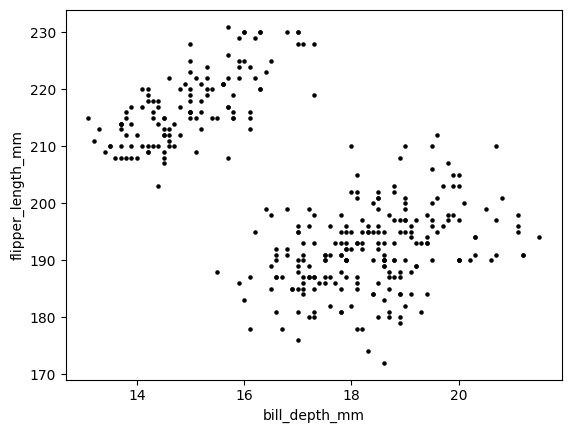

In [6]:
# Plot 2 columns
import matplotlib.pyplot as plt
# TODO: make a scatter plot of column 1 vs column 2 (use X slicing)
plt.scatter(X[:,1], X[:,2], s=5, c="k")

plt.xlabel('bill_depth_mm'), plt.ylabel('flipper_length_mm')
plt.show()

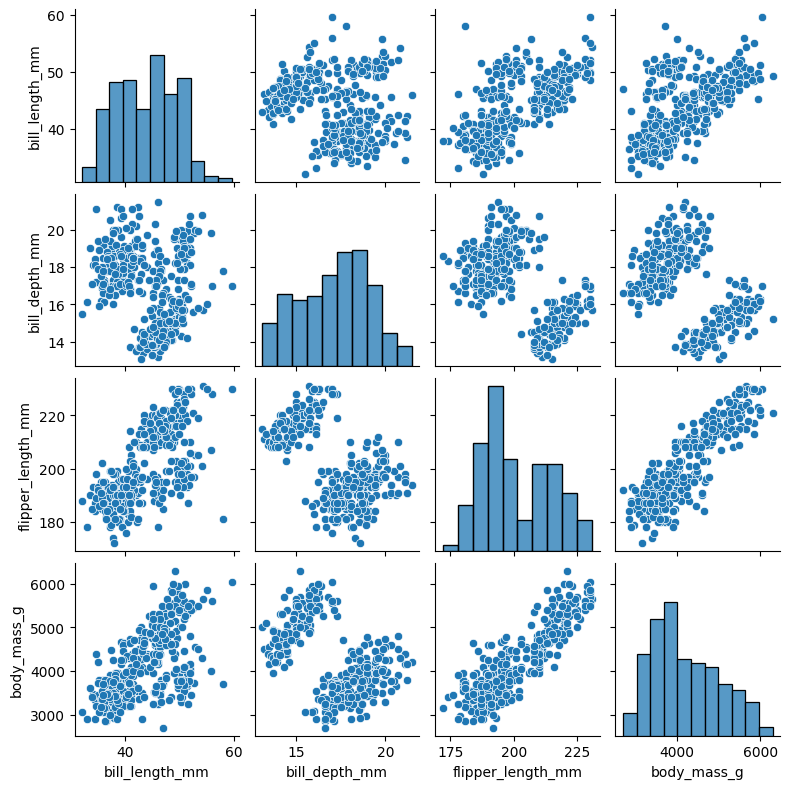

In [7]:
# Plot all column pairs
import seaborn as sns
# TODO: pairplot the dataframe (numeric columns only if needed)
sns.pairplot(data, height=2)

plt.show()
# which feature pairs look usefull for separating the species?

## 1.2.1 Vectors and Matrices (Linear Algebra)


In [10]:
# Numpy is the popular math module in Python
# A common alias is np
import numpy as np

# we can create an array using the "array" function
u = np.array([1., 3., 5. ,7.]) 

# we can view the array by printing it to the screen
# note: although vectors are typically notated as columns, python prints them horizontally
print(u)

[1. 3. 5. 7.]


In [ ]:
# TODO: print the first and second elements of u (remember Python is 0-indexed)

# arrays can be indexed using brackets, Python indexing starts at 0
print()
print()

1.0
3.0


In [ ]:
# numpy has a linear algebra sub module that we can use for linear algebra computation
# the documentation can be found at: https://numpy.org/doc/stable/reference/routines.linalg.html
from numpy import linalg as LA

# calculate the norm of our vector u
# TODO: compute ||u||_2 using numpy.linalg

9.16515138991168

### Sanity Check: Does this answer match with what you get using the formula for the Norm?

Hint: $ ||u||_2 = \sqrt{\sum_{i = 1}^{d}u_i^2}$

In [13]:
# here's a way to check using python
np.sqrt(
    np.sum(u ** 2)
)

# the vectorization of numpy allows us to perform operations on arrays without needing to write loops

9.16515138991168

### $\ell_1$ vs $\ell_2$ Norm

In [14]:
# Vectors v and w
v = np.array([1, 2, 3, 4])
w = np.array([0, 1, 0, 1])

In [ ]:
# let's calculate the l1 norm of v and w
print('V L1 Norm:', LA.norm(v, ord = 1))
print('W L1 Norm:', LA.norm(w, ord = 1), '\n')

# now the l2 norm of v and w
# TODO: print L1 and L2 norms of v and w using LA.norm(..., ord=?)



V L1 Norm: 10.0
W L1 Norm: 2.0 

V L2 Norm: 5.477225575051661
W L2 Norm: 1.4142135623730951


### P Norm Investigation

How does the P norm value change as P changes?

In [16]:
import matplotlib.pyplot as plt

### The $p$-norm of a vector

For a vector $u = (u_1, u_2, \dots, u_d)$ and $p \ge 1$, the $p$-norm is defined as

$$
\|u\|_p = \left( \sum_{i=1}^{d} |u_i|^p \right)^{1/p}.
$$
As $p \to \infty$, the $p$-norm converges to the infinity norm:

$$
\|u\|_\infty = \max_{1 \le i \le d} |u_i|.
$$

## Visualizing the $p$-norm as “circles”

A **norm** $\|\cdot\|$ defines a notion of length. Once we have a norm, we can define a distance between two points
$x, c \in \mathbb{R}^d$ by:

$$
d_p(x, c) = \|x - c\|_p.
$$

In ordinary Euclidean geometry, the set of points at distance $r$ from the origin is a **circle**:
$$
\{x \in \mathbb{R}^2 : \|x\|_2 = r\}.
$$

But if we change the norm, the “circle” changes shape. For $p \ge 1$:

$$
\|x\|_p = \left(|x_1|^p + |x_2|^p\right)^{1/p}.
$$

We will plot **iso-distance contours** (level sets) for several $p$ values:
$$
\{(x_1,x_2) : \|(x_1,x_2)\|_p = r\}.
$$

**Key idea:** changing $p$ changes what “equally far” means.

- $p=2$ (**L2 / Euclidean**) → round circles  
- $p=1$ (**L1**) → diamond-shaped contours  
- $p \to \infty$ (**$L_\infty$**) → square-shaped contours (distance is dominated by the largest coordinate)

This matters for the rest of the notebook because “closeness” between data points (and later, model penalties)
depends on the choice of norm.

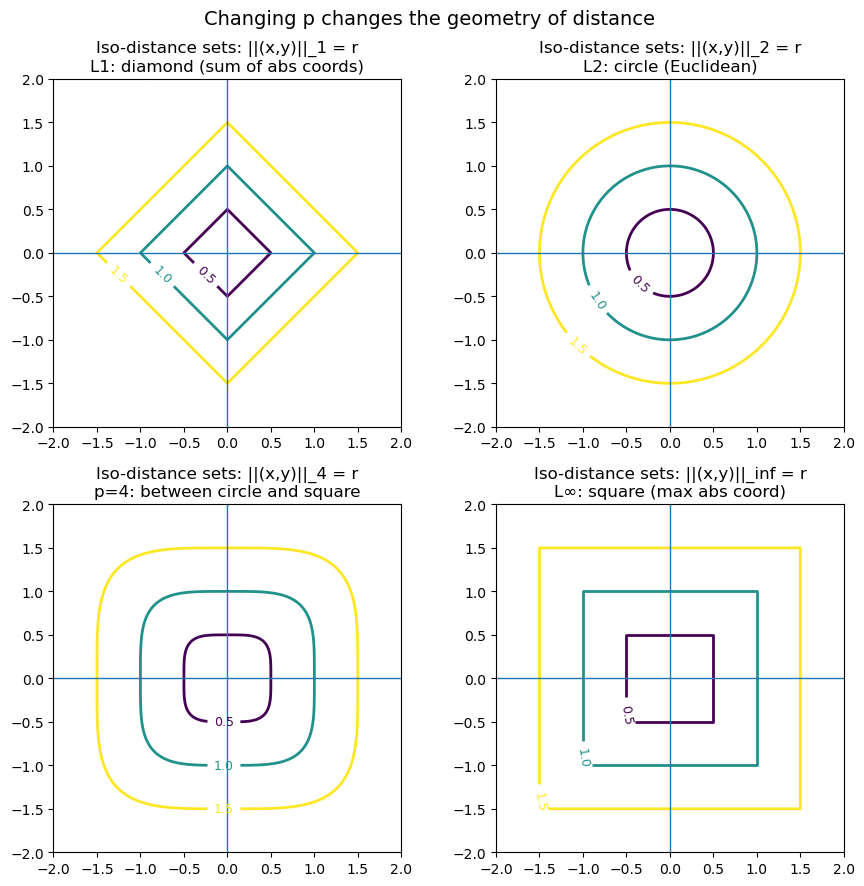

In [46]:
def lp_norm_2d(X, Y, p):
    """Compute ||(X,Y)||_p on a grid."""
    if np.isinf(p):
        return np.maximum(np.abs(X), np.abs(Y))
    return (np.abs(X)**p + np.abs(Y)**p)**(1/p)

# Grid over R^2
xs = np.linspace(-2, 2, 401)
ys = np.linspace(-2, 2, 401)
X, Y = np.meshgrid(xs, ys)

# Norm choices to compare
ps = [1, 2, 4, np.inf]
levels = [0.5, 1.0, 1.5]  # radii r

fig, axes = plt.subplots(2, 2, figsize=(9, 9))
axes = axes.ravel()

for ax, p in zip(axes, ps):
    Z = lp_norm_2d(X, Y, p)

    cs = ax.contour(X, Y, Z, levels=levels, linewidths=2)
    ax.clabel(cs, inline=True, fontsize=9)

    # Axes lines for reference
    ax.axhline(0, linewidth=1)
    ax.axvline(0, linewidth=1)

    # Equal scaling so shapes aren't distorted
    ax.set_aspect('equal', 'box')
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)

    # Title + quick interpretation
    if p == 1:
        subtitle = "L1: diamond (sum of abs coords)"
    elif p == 2:
        subtitle = "L2: circle (Euclidean)"
    elif p == 4:
        subtitle = "p=4: between circle and square"
    else:
        subtitle = "L∞: square (max abs coord)"

    ax.set_title(f"Iso-distance sets: ||(x,y)||_{p} = r\n{subtitle}")

fig.suptitle("Changing p changes the geometry of distance", fontsize=14)
plt.tight_layout()
plt.show()


 Exercise prompt:

“Which norm would treat outliers along one feature axis as most influential? (hint: 
𝐿
∞
L
∞
)”

“Which norm would make axis-aligned differences count more than diagonal ones? (hint: L1)”

**Key takeaway:**  
The value of a norm depends on how it weights large vs small components.
As $p$ increases, the largest component dominates the norm. This is why
different norms lead to different notions of distance and different
regularization behavior in machine learning.

A norm measures size, a 
𝑝
p-norm is a specific way to measure size, and regularization works by penalizing the norm of the model parameters—so choosing 
𝑝
p directly determines what kinds of solutions the model prefers.

### Vector addition, scalar multiplication, euclidean distance, and transpose and indexing of matrices

In [ ]:
# Vector Addition
v = np.array([1, 2, 3, 4])
w = np.array([0, 1, 0, 1])

# we can add two vectors
# TODO: compute v + w and print it

[1 3 3 5]


In [19]:
# Scalar Multiplication
print(2*w)

[0 2 0 2]


In [20]:
# Find Euclidean distance

# initializing vectors as numpy arrays
point1 = np.array((1, 2, 3))
point2 = np.array((1, 1, 1))

# calculating Euclidean distance using linalg.norm()
dist = np.linalg.norm(point1 - point2)

# printing Euclidean distance
print(dist)

2.23606797749979


In [ ]:
# Sanity check
our_dist = np.sqrt((1-1)**2 + (2-1)**2 + (3-1)**2)

# TODO: confirm it matches the norm-based computation


True

### Matrices

In [ ]:
# can create 2 different vectors
u = np.array([1., 3., 5., 7.])
v = np.array([2., 4., 6., 8.])

# using np.stack, we can put the two vectors together
# the axis parameter changes what direction they are stacked together
X = np.stack((u,v), axis=0)
print(X , '\n')

print(X.shape)
# we can also use np.vstack and np.hstack
# TODO:  use np.vstack and np.hstack

[[1. 3. 5. 7.]
 [2. 4. 6. 8.]] 

(2, 4)


In [35]:
# combining the two vectors in one to another vector
Y = np.array([u, v])
print(Y)

[[1. 3. 5. 7.]
 [2. 4. 6. 8.]]


In [36]:
# we can access using bracket indexing: [row, column]
print(Y[0,0])
print(Y[0,1])

1.0
3.0


In [37]:
# Transpose of Matrix
V = np.array(
    [
        [1, 2, 3],
        [4, 5, 6]
    ]
)
# all numpy arrays have a shape attribute that we can access
print('Shape of V:', V.shape, '\n')

# we can use the transpose function
VT = np.transpose(V)
print(r'V^{T}:', '\n', VT, '\n')

# or we can use .T
print(r'V^{T}:', '\n', V.T, '\n')

# note: although vectors are typically notated as columns, python prints them horizontally
print(VT.shape)

Shape of V: (2, 3) 

V^{T}: 
 [[1 4]
 [2 5]
 [3 6]] 

V^{T}: 
 [[1 4]
 [2 5]
 [3 6]] 

(3, 2)


In [38]:
# Transpose of a Matrix without Numpy

def transpose(matrix):
    """Transposes a given matrix."""

    # Create a new matrix with swapped dimensions
    transposed_matrix = [[0 for _ in range(len(matrix))] for _ in range(len(matrix[0]))]

    # Fill the transposed matrix
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):

            # swapping the j,i entry of the transpose to the i,j entry of the original matrix
            transposed_matrix[j][i] = matrix[i][j]

    return transposed_matrix

matrix = V
print(transpose(matrix))

[[1, 4], [2, 5], [3, 6]]


#### Matrix Multiplication

Note: Order matters! The inside dimensions of the multiplication must match.

i.e. We can multiply a 2x3 matrix with a 3x4, but we cannot multiply a 3x4 matrix with a 2x3 matrix.

A valid matrix multiplication:
$$
\displaystyle A_{2x3}B_{3x4}
$$

A not valid matrix mutlilication:
$$
\displaystyle B_{3x4}A_{2x3}
$$


In [ ]:
### we can multiply a vector and a matrix together

# let's make an array to multiply with our V matrix
# it must be 1x2 or 3x1 to be multiplied with a 2x3 matrix
v1 = np.array([1, 2])

# the transpose makes it a column vector
v2 = np.array([1, 2, 3]).T


# use the matmul function to do matrix multiplication, order matters!
print('v1 dot V:', np.matmul(v1, V))
print('V dot v2:', np.matmul(V, v2))


v1 dot V: [ 9 12 15]
V dot v2: [14 32]


In [ ]:
# how about matrix multiplication?
# define a valid matrix
U = np.array(
    [
        [5, 6],
        [2, 7],
        [10, 3]
    ]
)

print('U Matrix', '\n', U, '\n')

# use matmul again

# TODO: compute U @ V and V @ U

print('U dot V', '\n', UV, '\n')
print('V dot U', '\n', VU)

U Matrix 
 [[ 5  6]
 [ 2  7]
 [10  3]] 

U dot V 
 [[29 40 51]
 [30 39 48]
 [22 35 48]] 

V dot U 
 [[39 29]
 [90 77]]


### Frobenious

This norm is applied to an $mxn$ matrix. The Frobenious norm is defined as:


$$
||A||_F = ({\sum_{i=1}^{n} \sum_{j=1}^{m} A_{i,j}^2})^{\frac{1}{2}}
$$

In [ ]:
A = np.array(
    [
      [1., 0.],
      [0., 1.],
      [0., 0.]
    ]
)
print(A)

[[1. 0.]
 [0. 1.]
 [0. 0.]]


In [ ]:
LA.norm(A)

1.4142135623730951

We expect this value to be $(1^2 + 0^2 + 0^2 + 1^2 + 0^2 + 0^2)^{\frac{1}{2}} = (2)^{\frac{1}{2}} = \sqrt{2}$. Does our answer match?

In [ ]:
# TODO: verify it matches sqrt(2)


True

## 1.2.2 Plotting Functions

For now, we will just look at how to plot different functions using the matplotlib package.

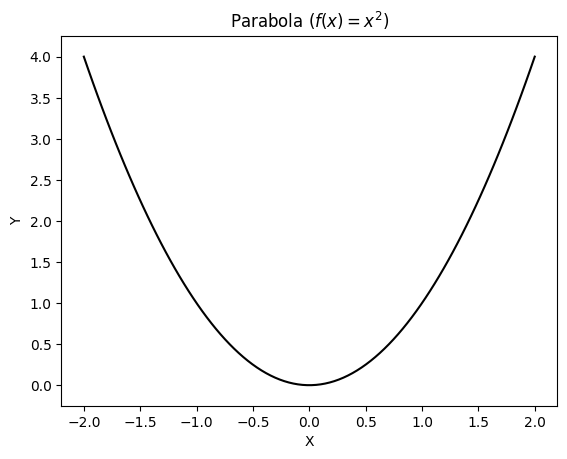

In [ ]:
# matplotlib is the main plotting library in Python
import matplotlib.pyplot as plt

# linspace creates an evenly spaced array
x = np.linspace(-2,2,100)

# TODO: compute y for f(x)=x^2

# we can plot using plt
plt.plot(x, y, c='k')
plt.ylim(-0.25,4.25)

# optional: Titles
plt.xlabel('X')
plt.ylabel('Y')
plt.title(r'Parabola ($f(x) = x^2$)')

plt.show()

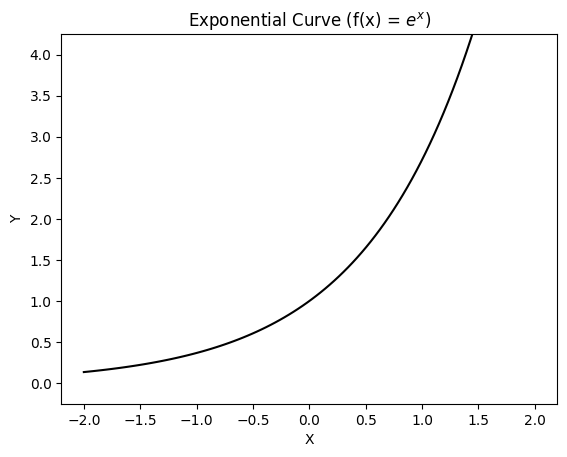

In [ ]:
# create the values for x and calcualte the y values using the exponential function
x = np.linspace(-2,2,100)
# TODO: compute y = exp(x)

# plot them, c = 'k' means color of the line is black
plt.plot(x, y, c='k')
plt.ylim(-0.25,4.25)

# optional: Titles
plt.xlabel('X')
plt.ylabel('Y')
plt.title(r'Exponential Curve (f(x) = $e^{x}$)')

plt.show()

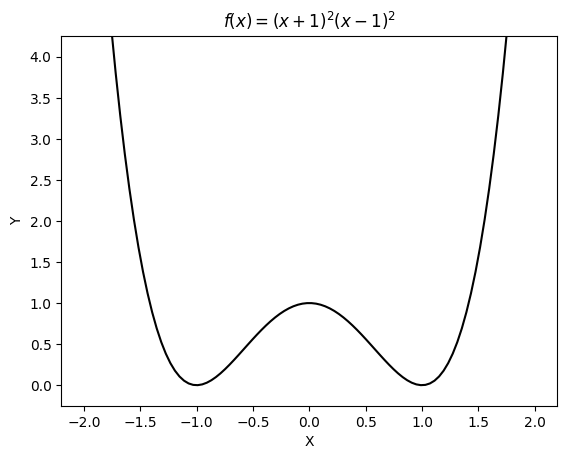

In [ ]:
x = np.linspace(-2,2,100)

# create a new function
# TODO: compute y = (x+1)^2 (x-1)^2

plt.plot(x,y,c='k')
plt.ylim(-0.25,4.25)


# optional: Titles
plt.xlabel('X')
plt.ylabel('Y')

# Tip: You can use latex in titles if you
# place it in string formatted as r''
plt.title(r'$f(x) = (x + 1)^2 (x-1)^2$')

plt.show()

### Sympy

Another package we can use is Sympy for symbolic python. The documentation is found here: https://docs.sympy.org/latest/index.html. The documetation on using matrices with sympy can be found here: https://docs.sympy.org/latest/tutorials/intro-tutorial/matrices.html.

In [ ]:
# Import sympy package
import sympy
# Makes sympy formatted nicely
sympy.init_printing(use_unicode=True)
from IPython.display import display

In [ ]:
# Matrix in nice display
A = sympy.Matrix([[1,0,-2,-1],[2,1,0,-1],[-1,3,-1,-2]])
A

⎡1   0  -2  -1⎤
⎢             ⎥
⎢2   1  0   -1⎥
⎢             ⎥
⎣-1  3  -1  -2⎦

In [ ]:
# Reduced Row Echelon Form
A.rref()

⎛⎡1  0  0  -1/5⎤           ⎞
⎜⎢             ⎥           ⎟
⎜⎢0  1  0  -3/5⎥, (0, 1, 2)⎟
⎜⎢             ⎥           ⎟
⎝⎣0  0  1  2/5 ⎦           ⎠